In [6]:
from keras.datasets import mnist
import numpy as np


In [18]:
import matplotlib.pyplot as plt

In [5]:
(x_train,_),(x_test,_) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [7]:
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [1]:
from keras.models import Model
from keras.layers import Input,Dense

In [3]:
input_img = Input(shape=(784,))
encoded = Dense(128,activation = "relu")(input_img)
encoded = Dense(64,activation = "relu")(encoded)
encoded = Dense(32,activation = "relu")(encoded)

decoded = Dense(64,activation = "relu")(encoded)
decoded = Dense(128,activation = "relu")(decoded)
decoded = Dense(784,activation = "sigmoid")(decoded)

In [13]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer = "adadelta",loss = "binary_crossentropy")


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
autoencoder.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test,X_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.3314 - val_loss: 0.2633
Epoch 2/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.2561 - val_loss: 0.2475
Epoch 3/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.2335 - val_loss: 0.2214
Epoch 4/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2107 - val_loss: 0.1998
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1959 - val_loss: 0.1905
Epoch 6/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1873 - val_loss: 0.1854
Epoch 7/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1814 - val_loss: 0.1771
Epoch 8/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1749 - val_loss: 0.1684
Epoch 9/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1684 - val_loss: 0.1631
Epoc

In [16]:
encoder = Model(input_img,encoded)

encoded_input = Input(shape=(32,))
decoder_layers = autoencoder.layers[4:]
decoder = Model(encoded_input,decoder_layers[0](encoded_input))

In [17]:
encoded_img = encoder.predict(X_test)
decoded_img = decoder.predict(encoded_img)

print(encoded_img.shape,decoded_img.shape)

(10000, 32) (10000, 64)


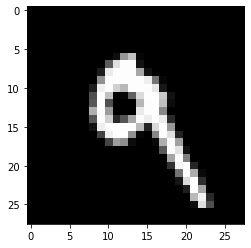

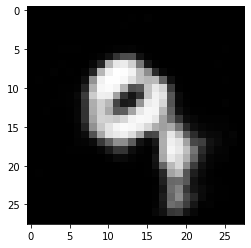

In [24]:
i=7

plt.imshow(X_test[i].reshape(28,28),cmap='gray')
plt.show()

out = autoencoder.predict(X_test[i].reshape(1,-1))

plt.imshow(out[0].reshape(28,28),cmap='gray')
plt.show()